In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [33]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
y_train.shape

(50000, 1)

In [37]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
y_train = y_train.reshape(-1,)  #reshape
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

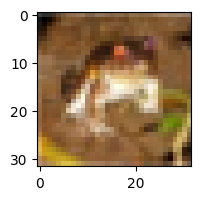

In [39]:
# test for showing the data
plt.figure(figsize = (15,2))  # setting the display image size
plt.imshow(X_train[0]) # show the data [0]

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [41]:
# plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

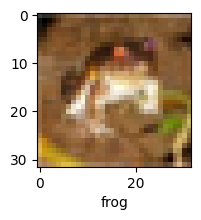

In [42]:
plot_sample(X_train, y_train, 0)

### Normalize data ###

In [43]:
# normalize data
# divide each value by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

## Build CNN ##

In [44]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # for normalize probability using softmax
])

In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4547 - accuracy: 0.4806 - val_loss: 1.2294 - val_accuracy: 0.5626
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1025 - accuracy: 0.6135 - val_loss: 1.0309 - val_accuracy: 0.6400
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9785 - accuracy: 0.6604 - val_loss: 0.9893 - val_accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8912 - accuracy: 0.6913 - val_loss: 0.9263 - val_accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8222 - accuracy: 0.7143 - val_loss: 0.9199 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7644 - accuracy: 0.7347 - val_loss: 0.9052 - val_accuracy: 0.6829
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7139 - accuracy: 0.7498 - val_loss: 0.9480 -

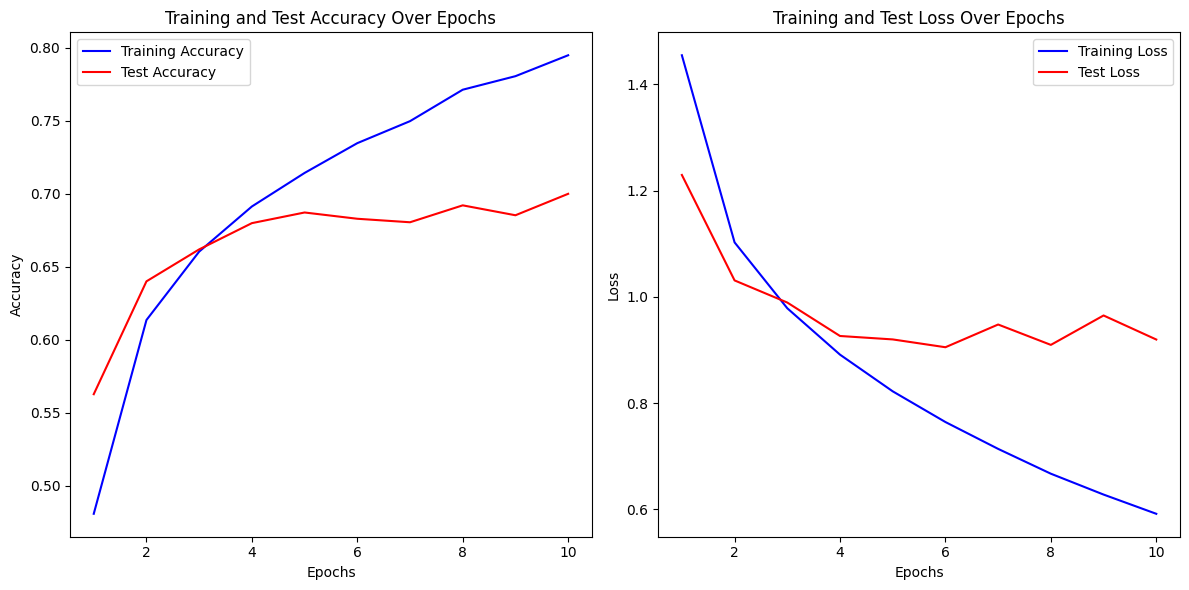

In [46]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Extracting training and test accuracy, training and test loss
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plotting accuracy and loss over epochs
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.0668 - accuracy: 0.6953


[1.0667656660079956, 0.6952999830245972]

313/313 [==============================] - 2s 7ms/step


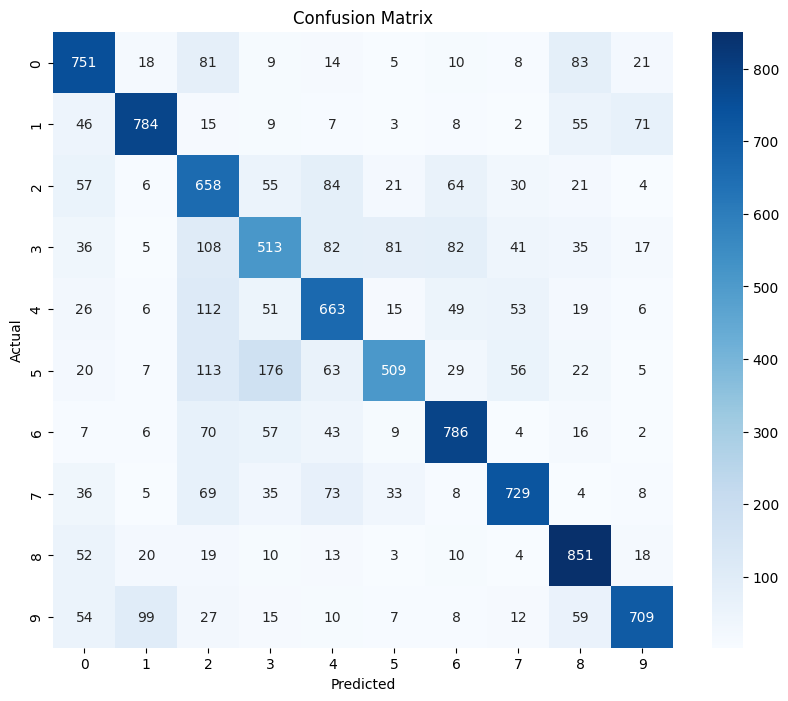

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model (cnn) and test data (X_test, y_test) available
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.82      0.78      0.80      1000
           2       0.52      0.66      0.58      1000
           3       0.55      0.51      0.53      1000
           4       0.63      0.66      0.65      1000
           5       0.74      0.51      0.60      1000
           6       0.75      0.79      0.77      1000
           7       0.78      0.73      0.75      1000
           8       0.73      0.85      0.79      1000
           9       0.82      0.71      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

